In [1752]:
import numpy as np 
import pandas as pd 

In [1753]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from pyvi import ViTokenizer
import string, nltk, re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [1754]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\84969\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\84969\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1755]:

train = pd.read_csv('train.csv', encoding='utf-8')
test = pd.read_csv('test.csv', encoding='utf-8')

In [1756]:
train.isnull().sum()

id         0
keyword    0
text       0
target     0
dtype: int64

In [1757]:
train = train.drop(columns = ['keyword'])
train.dtypes

id         int64
text      object
target     int64
dtype: object

In [1758]:
train 

,id,text,target
0,1,@WoodyLightyearx Mainnet mở 14/3/2023 là mốc l...,1
1,3,Chúc các phu nhân đc lì xì nhìu nhìu tiền zô n...,0
2,4,@LamNguy40552955 Dân Thanh Hoá ngày trước nghè...,1
3,5,"Bão lũ, cháy rừng gây thiệt hại trên 353 tỷ US...",1
4,6,@wwwaenii Mấy con đin này lại kỳ thị Việt kiều...,0
...,...,...,...
816,1016,WHO phát đi môṭ thông điệp cảnh báo thế giới đ...,1
817,1018,Các hành tinh xếp thẳng hàng cùng với sự xuất ...,1
818,1020,"""Chính phủ có kế hoạch thực hiện """"đánh giá rủ...",1
819,1021,@ZelenskyyUa Cái ý thức tập thể của mấy người ...,1


In [1759]:
train.describe()

,id,target
count,821.000000,821.000000
mean,512.590743,0.539586
std,296.586068,0.498734
min,1.000000,0.000000
25%,255.000000,0.000000
50%,514.000000,1.000000
75%,772.000000,1.000000
max,1022.000000,1.000000


In [1760]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      821 non-null    int64 
 1   text    821 non-null    object
 2   target  821 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 19.4+ KB


In [1761]:
train.isnull().sum()

id        0
text      0
target    0
dtype: int64

In [1762]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       201 non-null    int64 
 1   keyword  201 non-null    object
 2   text     201 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [1763]:
test.sample(10)

,id,keyword,text
152,759,lốc xoáy,"Tuyết, lụt lội, và có thể lốc xoáy đe dọa 11 t..."
143,715,lốc xoáy,@TNC404 chuẩn bị lốc xoáy luôn rồi . không còn...
101,512,khủng bố,"""Thế giới ngồi nhìn nhà nước khủng bố Nga phón..."
95,483,khủng bố,Putin đã đệ trình lên Duma Quốc gia dự thảo lu...
85,438,khủng bố,@robbystarbuck @EricSpracklen Bày nhìn vào nhữ...
90,462,khủng bố,Tổ chức khủng bố này tại sao có thể ngang nhiê...
49,256,cháy,Camera AI cháy rừng https://t.co/xDFHeCfhDg
36,196,cấp cứu,"Ghi nhận 2.000 ca đánh nhau phải khám, cấp cứu..."
69,354,hỏa hoạn,「Khi có hỏa hoạn xin đừng sử dụng thang máy」 h...
123,613,lốc xoáy,Hậu quả khi lốc xoáy và hoả hoạn xảy ra cùng t...


In [1764]:
test.isnull().sum()

id         0
keyword    0
text       0
dtype: int64

In [1765]:
train['target'].value_counts()

1    443
0    378
Name: target, dtype: int64

In [1766]:
print(f"Tweets thường :\n\n {train.loc[train['target']==0,'text'][50:60].values}", end="\n")

print()

print(f"Tweets thảm họa :\n\n {train.loc[train['target']==1,'text'][50:60].values}", end="\n")

Tweets thường :

 ['@bongBAYC có thở đâu ..đi cấp cứu zôi'
 '@OUchan_hubi_ C cũng cần cấp cứu rồi Chan ơi ....khen Bin xong hết thời gian'
 '@nngoc210 Cấp cứu, ô xi thiếu vs tấm này \U0001fae6\U0001fae6 https://t.co/jTrsDnhKxW'
 '@NguyenDuyTai18 Làm gì có bs yta thì làm dc mịa gì . Đưa đi cấp cứu chứ . Trẻ con ăn uống phải có sự kiểm soát'
 'Hanbin thật bad boy mà =)) cần cấp cứu gấp https://t.co/aZzHMkP8ez'
 'má nó chứ đang đi tìm phông chữ dở mà mắc miếng bánh chưng vô họng đi cấp cứu hay gì trời mà design ra đc quả ảnh này vậy'
 '@itsnotthatbadok Lỡ bài mới thì gọi cấp cứu cho chị =))'
 '@chimai101064 thì cấp cứu tạm thời cho bà'
 '@SerenaLy2468 đợi vài ngày nữa t cấp cứu cái đt xong đã nhá =))))'
 '@futacb614 nhiều quả tay ngang viết đỉnh lắm, năm ngoái t đọc fic trên ao3 mà còn có quả cấp cứu sản giật lạy từ dưới lạy lên cmnl, mà fic kphai có mỗi y mà kiến thức nền tôn giáo đ nào cũng biết í vì main chơi hệ phép thuật =))']

Tweets thảm họa :

 ['Tin Nóng Lũ Lụt Trung Quốc Hôm Nay

In [1767]:
def preprocessing(text):
    text = text.lower()
    # Remove URLs
    text = re.sub(r'https?://\S+', '', text)
    # Remove tags and hashtags
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)
    text = re.sub(r'#\S+', '', text)
    pattern = re.compile('[^a-z]')
    words = nltk.word_tokenize(text)
    preprocessed_text = ' '.join(words)
    return preprocessed_text

In [1768]:

def remove_punctuation(text):
    translator = str.maketrans('','',string.punctuation)
    return text.translate(translator)
    

In [1769]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

In [1770]:
def remove_stopwords(text, filename):
    with open(filename, 'r') as f:
        words_to_remove = set(f.read().splitlines())
    words = text.split()
    cleaned_words = [word for word in words if word not in words_to_remove]
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

In [1771]:
# Define a function to tokenize the text
def tokenize_text(text):
    return ViTokenizer.tokenize(text)

In [1772]:
filename = 'vietnamese-stopwords.txt'
train['text_cleaned']=train['text'].apply(preprocessing).apply(remove_urls).apply(remove_punctuation).apply(tokenize_text).apply(remove_stopwords, args=(filename,))
test['text_cleaned']=test['text'].apply(preprocessing).apply(remove_urls).apply(remove_punctuation).apply(tokenize_text).apply(remove_stopwords, args=(filename,))
train


,id,text,target,text_cleaned
0,1,@WoodyLightyearx Mainnet mở 14/3/2023 là mốc l...,1,mainnet 1432023 mốc lịch_sử trọng_đại cứu_cánh...
1,3,Chúc các phu nhân đc lì xì nhìu nhìu tiền zô n...,0,chúc phu_nhân đc lì_xì nhìu nhìu tiền zô bão l...
2,4,@LamNguy40552955 Dân Thanh Hoá ngày trước nghè...,1,dân hoá nghèo lắm hậu khắc_nghiệt mất_mùa bão ...
3,5,"Bão lũ, cháy rừng gây thiệt hại trên 353 tỷ US...",1,bão lũ cháy rừng thiệt_hại 353 tỷ usd 2022
4,6,@wwwaenii Mấy con đin này lại kỳ thị Việt kiều...,0,mấy đin kỳ_thị việt_kiều chúng_nó đ bão lũ hội...
...,...,...,...,...
816,1016,WHO phát đi môṭ thông điệp cảnh báo thế giới đ...,1,who phát đi môṭ thông_điệp cảnh_báo thế_giới
817,1018,Các hành tinh xếp thẳng hàng cùng với sự xuất ...,1,hành_tinh xếp thẳng hàng xuất_hiện
818,1020,"""Chính phủ có kế hoạch thực hiện """"đánh giá rủ...",1,chính_phủ kế_hoạch thực_hiện đánh_giá rủi_ro
819,1021,@ZelenskyyUa Cái ý thức tập thể của mấy người ...,1,ý_thức tập_thể mấy


In [1773]:
test

,id,keyword,text,text_cleaned
0,2,bão lũ,@Wendy_851 Ngày trc táo bón nên chưa xả đc. Gi...,trc táo_bón xả đc đc dịp xả bão lũ
1,9,bão lũ,@nagai_yue Lời bài Heather conan gray\nThánh c...,heather conan gray thánh_ca mùa đông chúa_tể t...
2,11,bão lũ,Hoa Kỳ và chiến dịch cứu trợ đồng bào lũ lụt V...,hoa kỳ chiến_dịch cứu_trợ đồng_bào lũ_lụt việt...
3,17,bão lũ,"Hà nội dần chuyển lạnh rồi, để cái bếp lửa ở đ...",hà nội dần lạnh bếp lửa ấm_áp nè mong ảnh_hưởn...
4,21,bão lũ,@MarkTin_ Ngon ngon thanks a nhé. Bão lũ mà vẫ...,ngon ngon thanks a bão lũ có_ăn
...,...,...,...,...
196,1002,thảm hỏa,"""quay về với cherry bomb thôi"" 1 cô nương nào ...",cherry bomb 1 nương đcm 2017 cherry bomb coi t...
197,1008,thảm hỏa,Các hành tinh xếp thẳng hàng cùng với sự xuất ...,hành_tinh xếp thẳng hàng xuất_hiện ngôi_sao ch...
198,1010,thảm hỏa,đi trong nhà mà không có dép là một thảm họa,đi dép thảm_họa
199,1017,thảm họa,Đi trong nhà mà không có dép là một thảm họa,đi dép thảm_họa


In [1774]:
x=train['text_cleaned'].values
y=train['target'].values

In [1775]:
classifier=CountVectorizer()
x=classifier.fit_transform(x)

In [1776]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=27,stratify=y)

In [1777]:
vocabulary = classifier.get_feature_names_out()
word_counts = x.sum(axis=0)
word_freqs = [(word, count) for word, count in zip(vocabulary, word_counts.tolist()[0])]
sorted_word_freqs = sorted(word_freqs, key=lambda x: x[1], reverse=True)
top_10_words = sorted_word_freqs[:10]
for word, count in top_10_words:
    print(f"{word}: {count}")

xoáy: 304
lốc: 301
khủng_bố: 176
bão: 168
lũ: 136
đi: 82
mỹ: 81
trung: 65
cấp_cứu: 61
nga: 55


In [1778]:
average_length = x.mean(axis=1)
print("Độ dài trung bình của các dòng dữ liệu:")
print(average_length)

Độ dài trung bình của các dòng dữ liệu:
[[0.00643463]
 [0.00380228]
 [0.00789705]
 [0.00263235]
 [0.0070196 ]
 [0.00643463]
 [0.0052647 ]
 [0.00263235]
 [0.00409476]
 [0.00409476]
 [0.00204738]
 [0.00087745]
 [0.00233987]
 [0.00233987]
 [0.00497221]
 [0.00263235]
 [0.00233987]
 [0.00321732]
 [0.00731208]
 [0.00555718]
 [0.00263235]
 [0.00380228]
 [0.00848201]
 [0.00204738]
 [0.0035098 ]
 [0.00146242]
 [0.00292483]
 [0.00292483]
 [0.0052647 ]
 [0.00555718]
 [0.00614215]
 [0.00146242]
 [0.00555718]
 [0.0070196 ]
 [0.00204738]
 [0.00263235]
 [0.0017549 ]
 [0.0087745 ]
 [0.00292483]
 [0.00233987]
 [0.00146242]
 [0.01023691]
 [0.00467973]
 [0.0052647 ]
 [0.00263235]
 [0.0035098 ]
 [0.00204738]
 [0.00263235]
 [0.00292483]
 [0.00146242]
 [0.00321732]
 [0.00321732]
 [0.00467973]
 [0.0035098 ]
 [0.00204738]
 [0.00321732]
 [0.00263235]
 [0.0070196 ]
 [0.00409476]
 [0.00731208]
 [0.00438725]
 [0.00380228]
 [0.00380228]
 [0.00292483]
 [0.00321732]
 [0.00438725]
 [0.00321732]
 [0.00321732]
 [0.0058

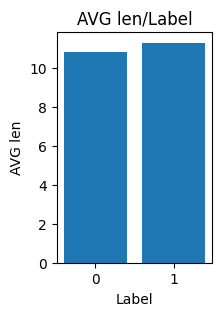

In [1779]:
import numpy as np
import matplotlib.pyplot as plt
labels = train['target'].unique()
average_lengths = []
for label in labels:
    group_indices = (y == label)
    group_x = x[group_indices]
    group_average_length = np.mean([group_x[i].getnnz() for i in range(group_x.shape[0])])
    average_lengths.append(group_average_length)
plt.figure(figsize=(2, 3))
plt.bar(labels, average_lengths)
plt.xlabel('Label')
plt.ylabel('AVG len')
plt.title('AVG len/Label')
plt.show()

In [1780]:
print(average_lengths)

[11.270880361173814, 10.788359788359788]


In [1781]:
vocab = classifier.vocabulary_
print("Vocab:", list(vocab.keys()))



Vocab: ['mainnet', '1432023', 'mốc', 'lịch_sử', 'trọng_đại', 'cứu_cánh', 'nhân_văn', 'ý_nghĩa', 'vĩ_đại', 'dịch_bệnh', 'covit19', 'hoành_hành', 'chiến_tranh', 'bão', 'lũ', 'thiên_tai', 'động_đất', 'bình_yên', 'hưởng_thụ', 'pi', 'thời_gian', 'chúc', 'phu_nhân', 'đc', 'lì_xì', 'nhìu', 'tiền', 'zô', 'đánh_bài', 'thắng', 'quài', 'dân', 'hoá', 'nghèo', 'lắm', 'hậu', 'khắc_nghiệt', 'mất_mùa', 'qoanh', 'mùa', 'lúa', 'gộp', 'hạn_hán', 'ngập', 'úngdân', 'th', 'đói', 'quanh_năm', 'lớp', 'tỏa', 'đi', 'khắp', 'miền', 'cháy', 'rừng', 'thiệt_hại', '353', 'tỷ', 'usd', '2022', 'mấy', 'đin', 'kỳ_thị', 'việt_kiều', 'chúng_nó', 'hội', 'từ_thiện', 'lô', 'vinfast', 'mẽo', 'hầu_như', 'toàn', 'vk', 'ủng_hộ', 'gửi', 'ngoại_tệ', 'gd', 'xây_dựng', 'quê_hương', 'đừng', 'mong_ước', 'cuộc_đời', 'sóng_gió', 'tiểu_thuyết', 'phim', 'truyền_hình', 'đời', 'gió', 'giật', '10', '11', 'tầm', 'nhìn_xa', 'trông', 'bài_học', 'đầu', 'hôm', 'bận', 'vl', 'bọn', 'xuất_hiện', 'chết', 'tim', 'hoa_hậu', 'bảo', 'ngọc', 'cứu_trợ', 't

In [1782]:
vocab = classifier.vocabulary_
word_count = len(vocab)
print("Số từ trong vocab:", word_count)

Số từ trong vocab: 3419


In [1783]:
df_a = pd.concat([test[['text_cleaned']]], axis=1)

# In kết quả bảng A
print(df_a)

                                          text_cleaned
0                   trc táo_bón xả đc đc dịp xả bão lũ
1    heather conan gray thánh_ca mùa đông chúa_tể t...
2    hoa kỳ chiến_dịch cứu_trợ đồng_bào lũ_lụt việt...
3    hà nội dần lạnh bếp lửa ấm_áp nè mong ảnh_hưởn...
4                      ngon ngon thanks a bão lũ có_ăn
..                                                 ...
196  cherry bomb 1 nương đcm 2017 cherry bomb coi t...
197  hành_tinh xếp thẳng hàng xuất_hiện ngôi_sao ch...
198                                    đi dép thảm_họa
199                                    đi dép thảm_họa
200                                    thảm_hoạ zombie

[201 rows x 1 columns]


In [1784]:
logReg=LogisticRegression(penalty='l2')
logReg.fit(x_train,y_train)

LogisticRegression()

In [1785]:
R=logReg.predict(x_train)
accuracy_score(y_train,R)

0.986449864498645

## Support Vector Classifier

In [1786]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(x_train,y_train)

SVC()

In [1787]:
pred=logReg.predict(x_test)

In [1788]:
accuracy_score(y_test,pred)

0.8433734939759037

In [1789]:
y_pre=svc_model.predict(x_test)

In [1790]:
score=accuracy_score(y_test,y_pre,normalize=True)
print(score)

0.8554216867469879


In [1791]:
x=classifier.transform(test['text'])

In [1792]:
predictions=svc_model.predict(x)

In [1793]:
prediction=logReg.predict(x)

In [1794]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
cm_lr = confusion_matrix(y_test, pred)
print("Confusion Matrix (Logistic Regression):\n", cm_lr)

# Calculate and display the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pre)
print("Confusion Matrix (SVM):\n", cm_svm)

Confusion Matrix (Logistic Regression):
 [[31  7]
 [ 6 39]]
Confusion Matrix (SVM):
 [[32  6]
 [ 6 39]]


In [1795]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred)


print("Mean Square Error is: ", mse(y_test, pred))
print("F1 Score is: ", f1_score(y_test, pred))
print("R Square score is: ", r2_score(y_test, pred))
print("Accuracy score is ", accuracy_score(y_test, pred))
print(f"Accuracy score is {((accuracy_score(y_test, pred))*100).round(2)}%")

Mean Square Error is:  0.1566265060240964
F1 Score is:  0.8571428571428571
R Square score is:  0.36900584795321645
Accuracy score is  0.8433734939759037
Accuracy score is 84.34%


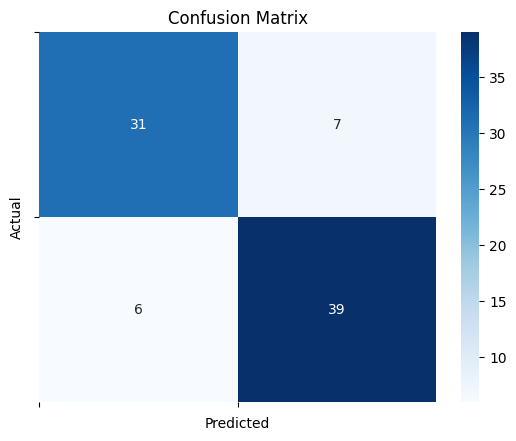

In [1796]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")

# Add labels, title, and ticks to the plot
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(ticks=[0, 1])  # Set x-axis tick locations
plt.yticks(ticks=[0, 1])  # Set y-axis tick locations

# Display the plot
plt.show()

In [1797]:
submission = pd.DataFrame({'id':test['id'],'target':prediction})
submission.to_csv('submission.csv',index=False)

In [1798]:
y_pred_svc = svc_model.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy of SVC model:", accuracy_svc)

Accuracy of SVC model: 0.8554216867469879


In [1799]:
logReg = LogisticRegression(penalty='l2')
logReg.fit(x_train, y_train)


probabilities = logReg.predict_proba(x_test)


threshold = 0.45


y_pred_threshold = (probabilities[:, 1] >= threshold).astype(int)


accuracy_threshold = accuracy_score(y_test, y_pred_threshold)
print("Accuracy with new threshold:", accuracy_threshold)


Accuracy with new threshold: 0.8433734939759037


In [1800]:

def predict_input():
    while True:
        user_input = input("Nhập văn bản (hoặc nhấn 'q' để thoát): ")
        if user_input.lower() == 'q':
            break
        cleaned_input = remove_urls(user_input)
        cleaned_input = remove_punctuation(cleaned_input)
        cleaned_input = tokenize_text(cleaned_input)
        cleaned_input = remove_stopwords(cleaned_input, filename)
        x_input = classifier.transform([cleaned_input])
        prediction_logReg = logReg.predict(x_input)
        prediction_svc = svc_model.predict(x_input)

        print("Dự đoán (Logistic Regression):", prediction_logReg[0])
        print("Dự đoán (SVM):", prediction_svc[0])

predict_input()

Dự đoán (Logistic Regression): 0
Dự đoán (SVM): 0
